In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import animation, rc
# import seaborn as sns
import os
from glob import glob

%matplotlib inline

In [8]:
def make_animation(run_name, steps=None, lims=[-200, 200], tstep=200):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    line, = ax.plot([], [], 'ko', ms=5)
    x, y = [], []
    path = '../results/'+run_name+'/'
    if steps is None:
        #get all steps
        steps = []
        for infile in glob( os.path.join(path, '*.dat') ):
            steps.append(int(infile.split('/')[-1].lstrip('step_').strip('.dat')))
    steps = sorted(steps)
    for i in steps:
        infile = path + 'step_{:d}.dat'.format(i)
        data = np.loadtxt(infile, unpack=True)
        x.append(data[0])
        y.append(data[1])
    x = np.array(x)
    y = np.array(y)
    
    def init():
        line.set_data([], [])
        return (line,)

    def animate(i):
        x_ = x[i]
        y_ = y[i]
        line.set_data(x_, y_)
        return (line,)
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(len(x)), interval=tstep, 
                               blit=True)
    return anim, x, y

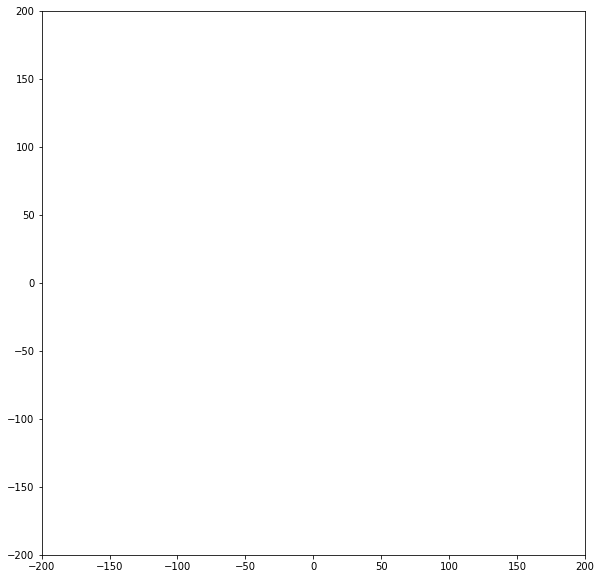

In [9]:
anim, x, y = make_animation("one")

In [10]:
anim.save('one_2d.mp4', writer = 'ffmpeg', fps = 30) 

In [11]:
import mpl_toolkits.mplot3d.axes3d as p3

In [12]:
def make_3d_animation(run_name, steps=None, lims=[-200, 200], tstep=200):
#     fig, ax = plt.subplots(figsize=(10,10))
    fig = plt.figure(figsize=(10,10))
    ax = p3.Axes3D(fig)
#     ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_zlim(lims)

    line, = ax.plot([], [], [], 'ko', ms=5)
    x, y, z = [], [], []
    path = '../results/'+run_name+'/'
    if steps is None:
        #get all steps
        steps = []
        for infile in glob( os.path.join(path, '*.dat') ):
            steps.append(int(infile.split('/')[-1].lstrip('step_').strip('.dat')))
    steps = sorted(steps)
    for i in steps:
        infile = path + 'step_{:d}.dat'.format(i)
        data = np.loadtxt(infile, unpack=True)
        x.append(data[0])
        y.append(data[1])
        z.append(data[2])
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)

    
    def init():
        line.set_data(np.array([]), [])
        line.set_3d_properties([])
        return (line,)

    def animate(i):
        x_ = x[i]
        y_ = y[i]
        z_ = z[i]
        line.set_data(np.array(x_), y_)
        line.set_3d_properties(z_)
        return (line,)
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(len(x)), interval=tstep, 
                               blit=True)
    return anim, x, y

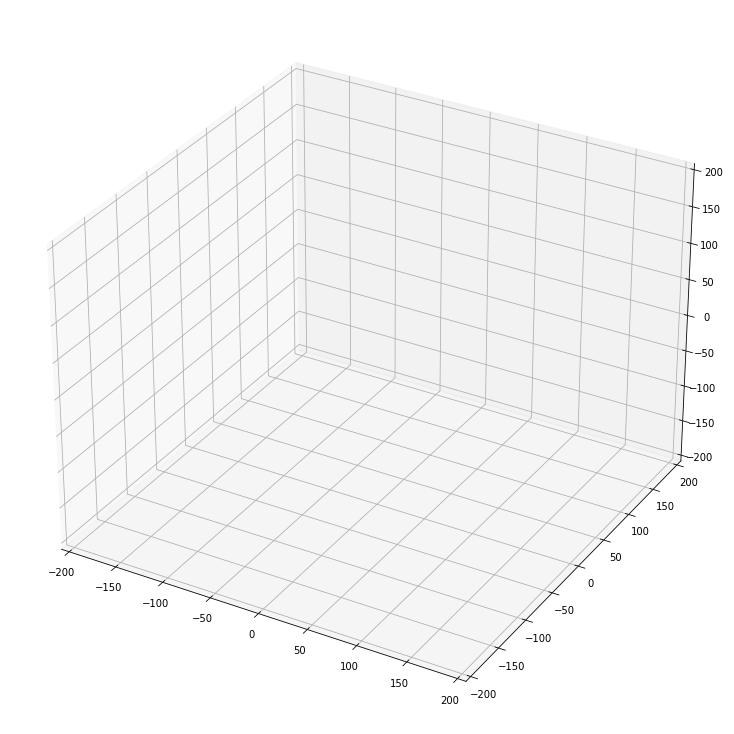

In [32]:
anim, x, y = make_3d_animation("two")

In [34]:
anim.save('two_3d.mp4', writer = 'ffmpeg', fps = 30) 